# Transaction Fraud Analysis


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("PS1.csv")
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
1,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
2,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
3,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
4,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6496,6,TRANSFER,33332.86,C2025652936,33332.86,0.00,C1662235713,0.00,0.00,1,0
6497,6,TRANSFER,25975.86,C864622150,25975.86,0.00,C41792607,0.00,0.00,1,0
6498,6,TRANSFER,26768.50,C457596841,26768.50,0.00,C1956477953,0.00,0.00,1,0
6499,6,TRANSFER,30521.02,C903383636,30521.02,0.00,C904300960,0.00,0.00,1,0


In [3]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
1,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
2,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
3,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
4,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0


In [4]:
#Finding Null values in the dataset
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# No null values found in the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6501 entries, 0 to 6500
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            6501 non-null   int64  
 1   type            6501 non-null   object 
 2   amount          6501 non-null   float64
 3   nameOrig        6501 non-null   object 
 4   oldbalanceOrg   6501 non-null   float64
 5   newbalanceOrig  6501 non-null   float64
 6   nameDest        6501 non-null   object 
 7   oldbalanceDest  6501 non-null   float64
 8   newbalanceDest  6501 non-null   float64
 9   isFraud         6501 non-null   int64  
 10  isFlaggedFraud  6501 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 558.8+ KB


In [6]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6501.000000,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6501.000000,6501.0
mean,13.415782,5.926155e+05,1.952957e+05,1.448292e+05,1.855760e+06,2.941109e+06,0.022612,0.0
std,13.401051,7.373025e+05,8.812490e+05,8.254397e+05,3.428212e+06,4.264593e+06,0.148674,0.0
min,1.000000,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,4.876021e+04,0.000000e+00,0.000000e+00,3.602100e+04,2.674471e+05,0.000000,0.0
50%,8.000000,3.277451e+05,6.065000e+03,0.000000e+00,4.558923e+05,1.284004e+06,0.000000,0.0
75%,9.000000,8.777798e+05,5.185700e+04,0.000000e+00,1.887918e+06,3.638202e+06,0.000000,0.0
max,95.000000,1.000000e+07,1.630000e+07,1.380000e+07,3.010000e+07,3.200000e+07,1.000000,0.0


In [7]:
#Removing the unwanted columns 
dataset.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)


In [8]:
dataset

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_IN,143236.26,0.00,143236.26,608932.17,97263.78,0,0
1,1,CASH_IN,228451.89,143236.26,371688.15,719678.38,1186556.81,0,0
2,1,CASH_IN,35902.49,371688.15,407590.65,49003.30,0.00,0,0
3,1,CASH_IN,232953.64,407590.65,640544.28,1172672.27,1517262.16,0,0
4,1,CASH_IN,65912.95,640544.28,706457.23,104198.26,24044.18,0,0
...,...,...,...,...,...,...,...,...,...
6496,6,TRANSFER,33332.86,33332.86,0.00,0.00,0.00,1,0
6497,6,TRANSFER,25975.86,25975.86,0.00,0.00,0.00,1,0
6498,6,TRANSFER,26768.50,26768.50,0.00,0.00,0.00,1,0
6499,6,TRANSFER,30521.02,30521.02,0.00,0.00,0.00,1,0


In [9]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6501.000000,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6501.000000,6501.0
mean,13.415782,5.926155e+05,1.952957e+05,1.448292e+05,1.855760e+06,2.941109e+06,0.022612,0.0
std,13.401051,7.373025e+05,8.812490e+05,8.254397e+05,3.428212e+06,4.264593e+06,0.148674,0.0
min,1.000000,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,4.876021e+04,0.000000e+00,0.000000e+00,3.602100e+04,2.674471e+05,0.000000,0.0
50%,8.000000,3.277451e+05,6.065000e+03,0.000000e+00,4.558923e+05,1.284004e+06,0.000000,0.0
75%,9.000000,8.777798e+05,5.185700e+04,0.000000e+00,1.887918e+06,3.638202e+06,0.000000,0.0
max,95.000000,1.000000e+07,1.630000e+07,1.380000e+07,3.010000e+07,3.200000e+07,1.000000,0.0


In [29]:
dataset.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,-0.298950,0.074942,0.093471,-0.055620,-0.150475,0.048329,NaN,0.063242,0.822646,-0.088669,-0.769720
amount,-0.298950,1.000000,0.063494,-0.068799,0.257062,0.428873,0.006640,NaN,-0.074762,-0.360698,-0.096461,0.410417
oldbalanceOrg,0.074942,0.063494,1.000000,0.940467,-0.006523,-0.025073,0.078829,NaN,0.011520,-0.066378,-0.008665,-0.183647
newbalanceOrig,0.093471,-0.068799,0.940467,1.000000,-0.005021,-0.039522,-0.019342,NaN,-0.028320,-0.044452,-0.002476,-0.220188
oldbalanceDest,-0.055620,0.257062,-0.006523,-0.005021,1.000000,0.916460,-0.068953,NaN,-0.063890,-0.073455,-0.065573,0.112504
newbalanceDest,-0.150475,0.428873,-0.025073,-0.039522,0.916460,1.000000,-0.078178,NaN,-0.067955,-0.171795,-0.083542,0.221445
isFraud,0.048329,0.006640,0.078829,-0.019342,-0.068953,-0.078178,1.000000,NaN,0.393702,-0.068830,-0.018423,-0.094543
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_CASH_OUT,0.063242,-0.074762,0.011520,-0.028320,-0.063890,-0.067955,0.393702,NaN,1.000000,-0.087249,-0.023353,-0.335354
type_DEBIT,0.822646,-0.360698,-0.066378,-0.044452,-0.073455,-0.171795,-0.068830,NaN,-0.087249,1.000000,-0.054813,-0.787110


In [ ]:
# Correlation
# Correlation is relation between  the two columns
# For this dataset we can see mixed corrrelation between independend and dependend data
# Fraud and cashout is 1.0 its a positive Correlation


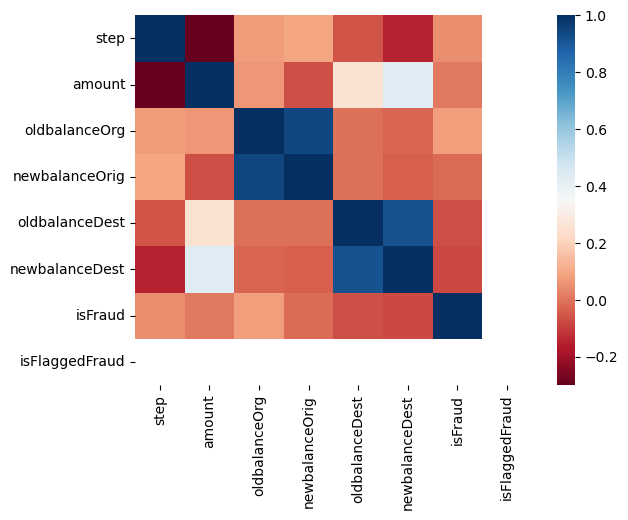

In [11]:
sns.heatmap(dataset.corr(numeric_only=True),cmap='RdBu');

In [12]:
dataset.cov(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.795882e+02,-2.953815e+06,8.850407e+05,1.033953e+06,-2.555262e+06,-8.599637e+06,0.096289,0.0
amount,-2.953815e+06,5.436149e+11,4.125501e+10,-4.187070e+10,6.497573e+11,1.348503e+12,727.846036,0.0
oldbalanceOrg,8.850407e+05,4.125501e+10,7.765999e+11,6.841127e+11,-1.970537e+10,-9.422684e+10,10328.140397,0.0
newbalanceOrig,1.033953e+06,-4.187070e+10,6.841127e+11,6.813506e+11,-1.420964e+10,-1.391247e+11,-2373.701494,0.0
oldbalanceDest,-2.555262e+06,6.497573e+11,-1.970537e+10,-1.420964e+10,1.175264e+13,1.339858e+13,-35144.297111,0.0
newbalanceDest,-8.599637e+06,1.348503e+12,-9.422684e+10,-1.391247e+11,1.339858e+13,1.818675e+13,-49567.438951,0.0
isFraud,9.628923e-02,7.278460e+02,1.032814e+04,-2.373701e+03,-3.514430e+04,-4.956744e+04,0.022104,0.0
isFlaggedFraud,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0


In [ ]:
# Covariance
# Covariance is dfference between the two columns
# For this dataset we can see mixed covariance between independend and dependend data
#covariance between newbalanceDest and oldbalanceDest is 1.33 its a positive covariance.


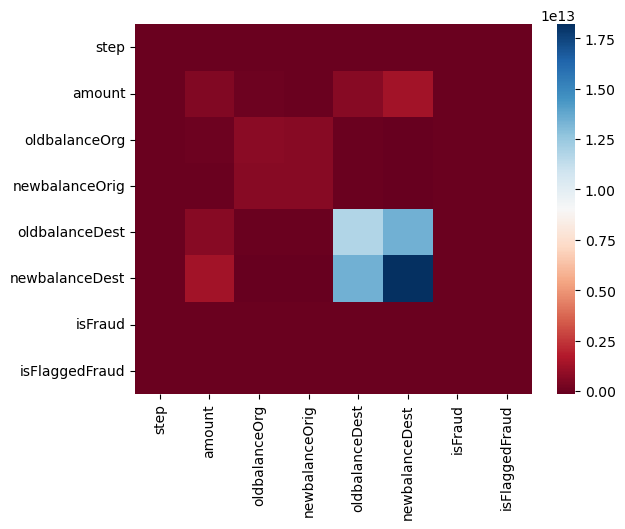

In [13]:
sns.heatmap(dataset.cov(numeric_only=True),cmap='RdBu');

In [14]:
# Change the categorical to numerical values using one-hot encoding
dataset = pd.get_dummies(dataset,columns=['type'], drop_first=True)
dataset

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,143236.26,0.00,143236.26,608932.17,97263.78,0,0,False,False,False,False
1,1,228451.89,143236.26,371688.15,719678.38,1186556.81,0,0,False,False,False,False
2,1,35902.49,371688.15,407590.65,49003.30,0.00,0,0,False,False,False,False
3,1,232953.64,407590.65,640544.28,1172672.27,1517262.16,0,0,False,False,False,False
4,1,65912.95,640544.28,706457.23,104198.26,24044.18,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6496,6,33332.86,33332.86,0.00,0.00,0.00,1,0,False,False,False,True
6497,6,25975.86,25975.86,0.00,0.00,0.00,1,0,False,False,False,True
6498,6,26768.50,26768.50,0.00,0.00,0.00,1,0,False,False,False,True
6499,6,30521.02,30521.02,0.00,0.00,0.00,1,0,False,False,False,True


In [15]:
dataset.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [16]:
#segregate Independent and Dependent variable.
indep=dataset[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest','type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
depe=dataset[["isFraud"]]

In [17]:
# Split the test & train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, depe, test_size=1/3, random_state=0)


# sklearn standardscaler is used for fitting the best result
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]} 



grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train)

#predict the xtest 
y_pred = grid.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DIKSHA\anaconda3\Lib\site-pack

[[2120    3]
 [  12   32]]


In [18]:
#once we get the classfied value, to analyse the report we have to do te classification report.
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2123
           1       0.91      0.73      0.81        44

    accuracy                           0.99      2167
   macro avg       0.95      0.86      0.90      2167
weighted avg       0.99      0.99      0.99      2167



# Above score is for Random Forest using grid function

In [19]:
# let explore with Select k Classified function

In [20]:
# using Selectkbest algorith using Chisquare or RMS formula,it will evaluate the model and provide the best input
#Chi square will analyse the data and provide the result as per k value
#it provide Rscore value across all the models
def selectkbest(indep_X,dep_Y,n):
        test = SelectKBest(score_func=chi2, k=n)
        fit1= test.fit(indep,depe)
        # summarize scores       
        selectk_features = fit1.transform(indep)
        return selectk_features
# Using standard scaler and split the train and test set

def split_scalar(indep,depe):
        X_train, X_test, y_train, y_test = train_test_split(indep, depe, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
#A confusion matrix is a table that is often used to evaluate the performance of a
#classification algorithm on a set of labeled data
#It provides a summary of the predictions made by a classification model compared to the actual true values. 
#The matrix has four entries: true positive (TP), false positive (FP), true negative (TN), and false negative (FN).
def cm_prediction(classifier,X_test):
    
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
    Accuracy=accuracy_score(y_test, y_pred )
#once above model creates in return  classifier,Accuracy,report,X_test,y_test
    report=classification_report(y_test, y_pred)
    return  classifier,Accuracy,report,X_test,y_test,cm


def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm   


def svm_linear(X_train,y_train,X_test):
    
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

def Navie(X_train,y_train,X_test):       
        
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm 
    
def knn(X_train,y_train,X_test):
           
        
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def Decision(X_train,y_train,X_test):
        
        
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm  
def random(X_train,y_train,X_test):
        
        
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
#for creating table and providing the score
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
#enumerate is for creating the index and providing the no in the table
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe


In [21]:
depe.value_counts()

isFraud
0          6354
1           147
Name: count, dtype: int64

In [22]:
kbest=selectkbest(indep,depe,6)       

acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

In [23]:
X_train, X_test, y_train, y_test=split_scalar(kbest,depe)   
    
        
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result

C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DIKSHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.978475,0.97663,0.977245,0.98524,0.9631,0.992005,0.99016


# we got an average score of 90% for all the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, depe, test_size=1/3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
grid = RandomForestClassifier()
grid.fit(X_train,y_train)

In [24]:
print("Transaction fraud:")
amount = float(input("amount: "))
oldbalanceOrg = float(input("oldbalanceOrg: "))  
newbalanceOrig = float(input("newbalanceOrig: "))  
oldbalanceDest = float(input("oldbalanceDest: "))
newbalanceDest = float(input("newbalanceDest: "))
type_CASH_OUT = float(input("type_CASH_OUT: "))
type_DEBIT = float(input("type_DEBIT: "))
type_PAYMENT = float(input("type_PAYMENT: "))
type_TRANSFER = float(input("type_TRANSFER: "))

Future_Prediction = grid.predict([[amount, oldbalanceOrg, newbalanceOrig,  # corrected variable names
                                   oldbalanceDest, newbalanceDest, type_CASH_OUT,
                                   type_DEBIT, type_PAYMENT, type_TRANSFER]])
print("Future_Prediction={}".format(Future_Prediction))


Transaction fraud:
amount: 225000
oldbalanceOrg: 37000
newbalanceOrig: 262000
oldbalanceDest: 145000
newbalanceDest: 117000
type_CASH_OUT: 1
type_DEBIT: 0
type_PAYMENT: 0
type_TRANSFER: 0
Future_Prediction=[0]


C:\Users\DIKSHA\AppData\Local\Temp\ipykernel_10636\4231973477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['isFraud'],hist=True,kde_kws={'color':'red'})


<Axes: xlabel='isFraud', ylabel='Density'>

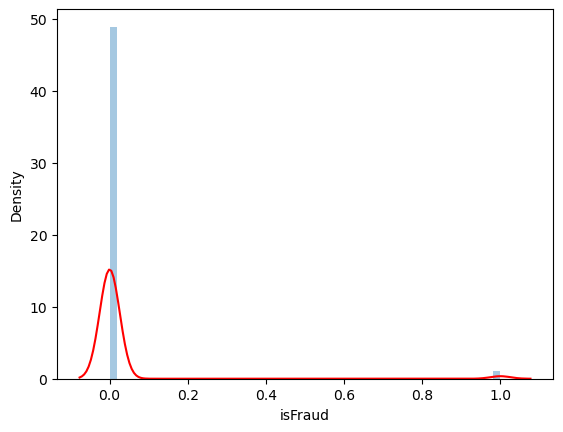

In [25]:
import seaborn as sns
import matplotlib.pyplot as p
sns.distplot(dataset['isFraud'],hist=True,kde_kws={'color':'red'})

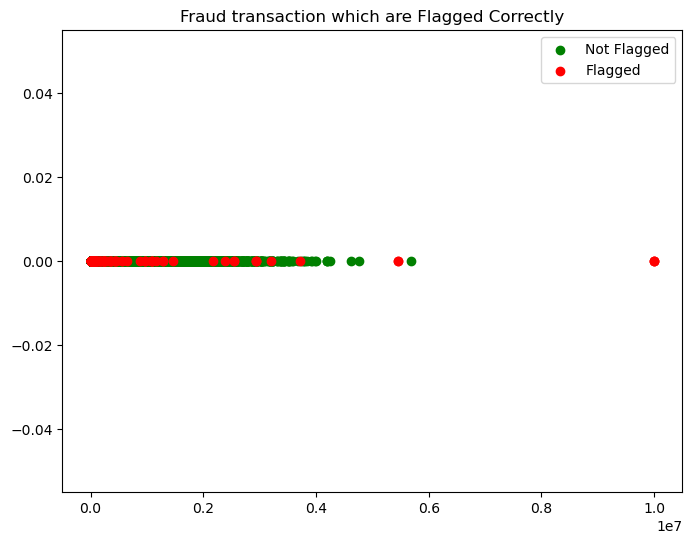

In [26]:
nonfraud = dataset[dataset['isFraud'] == 0]
fraud = dataset[dataset['isFraud'] == 1]

# Now you can plot the scatter plot
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'], nonfraud['isFlaggedFraud'], c='g')
axes.scatter(fraud['amount'], fraud['isFlaggedFraud'], c='r')
plt.legend(loc='upper right', labels=['Not Flagged', 'Flagged'])
plt.show()

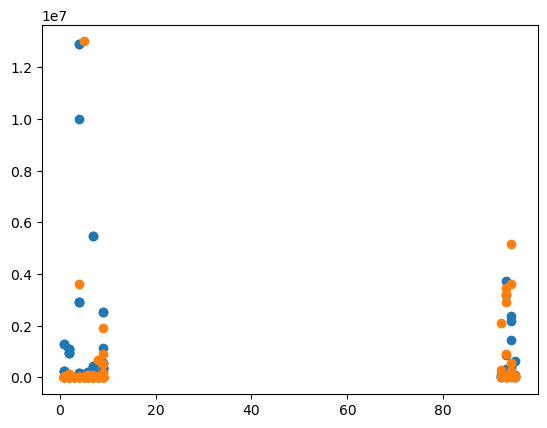

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()